Credits: https://git.lcsr.jhu.edu/cjones96/basic-unet-segmentation

## U-Net Convolutional Networks for Image Segmentation

### U-Net

U-Net is a widely used deep learning architecture that was first introduced in the “U-Net: Convolutional Networks for Biomedical Image Segmentation” paper. The primary purpose of this architecture was to address the challenge of limited annotated data in the medical field. This network was designed to effectively leverage a smaller amount of data while maintaining speed and accuracy.



The architecture of U-Net is unique in that it consists of a contracting path and an expansive path. The contracting path contains encoder layers that capture contextual information and reduce the spatial resolution of the input, while the expansive path contains decoder layers that decode the encoded data and use the information from the contracting path via skip connections to generate a segmentation map.

The contracting path in U-Net is responsible for identifying the relevant features in the input image. The encoder layers perform convolutional operations that reduce the spatial resolution of the feature maps while increasing their depth, thereby capturing increasingly abstract representations of the input. This contracting path is similar to the feedforward layers in other convolutional neural networks. On the other hand, the expansive path works on decoding the encoded data and locating the features while maintaining the spatial resolution of the input. The decoder layers in the expansive path upsample the feature maps, while also performing convolutional operations. The skip connections from the contracting path help to preserve the spatial information lost in the contracting path, which helps the decoder layers to locate the features more accurately.

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*zYrwp34DslR_9wLHMVAITg.png)

Source: [https://arxiv.org/pdf/1505.04597](https://arxiv.org/pdf/1505.04597)

### Explanation

Credits: see blog by [A. Ito Armendia](https://medium.com/@alejandro.itoaramendia/decoding-the-u-net-a-complete-guide-810b1c6d56d8)

**The Contracting Path of U-Net**


![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Ofmoljm8odP3Od_PHNMdAg.png)


**Block 1**

An input image with dimensions 572² is fed into the U-Net. This input image consists of only 1 channel, likely a grayscale channel.
Two 3x3 convolution layers (unpadded) are then applied to the input image, each followed by a ReLU layer. At the same time the number of channels are increased to 64 in order to capture higher level features.
A 2x2 max pooling layer with a stride of 2 is then applied. This downsamples the feature map to half its size, 284².

**Block 2**

Just like in block 1, two 3x3 convolution layers (unpadded) are applied to the output of block 1, each followed again by a ReLU layer. At each new block the number of feature channels are doubled, now to 128.
Next a 2x2 max pooling layer is again applied to the resulting feature map reducing the spatial dimensions by half to 140².

**Block 3**

The procedure used in block 1 and 2 is the same as in block 3, so will not be repeated.

**Block 4**

Same as block 3.

**Block 5**

In the final block of the contracting path, the number of feature channels reach 1024 after being doubled at each block.
This block also contains two 3x3 convolution layers (unpadded), which are each followed by a ReLU layer. However, for symmetry purposes, I have only included one layer and included the second layer in the expanding path.
After complex features and patterns have been extracted, the feature map moves on to the expanding path.

**The Expanding Path**


![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*YezvSRtIOSLEeEwwyOMzgA.png)



**Block 5**

1. Continuing on from the contracting path, a second 3x3 convolution (unpadded) is applied with a ReLU layer after it.
2. Then a 2x2 convolution (up-convolution) layer is applied, upsampling the spatial dimensions twofold and also halving the number of channels to 512.

**Block 4**

1. Using skip connections, the corresponding feature map from the contracting path is then concatenated, doubling the feature channels to 1024. Note that this concatenation must be cropped to match the expanding path’s dimensions.
2. Two 3x3 convolution layers (unpadded) are applied, each with a ReLU layer following, reducing the channels to 512.
3. After, a 2x2 convolution (up-convolution) layer is applied, upsampling the spatial dimensions twofold and also halving the number of channels to 256.

**Block 3**

The procedure used in block 5 and 4 is the same as in block 3, so will not be repeated.

**Block 2**

Same as block 3.

**Block 1**

1. In the final block of the expanding path, there are 128 channels after concatenating the skip connection.
2. Next, two 3x3 convolution layers (unpadded) are applied on the feature map, with ReLU layers inbetween reducing the number of feature channels to 64.
3. Finally, a 1x1 convolution layer, followed by an activation layer (sigmoid for binary classification) is used to reduce the number of channels to the desired number of classes. In this case, 2 classes, as binary classification is often used in medical imaging.

After upsampling the feature map in the expanding path, a segmentation map should be generated, with each pixel classified individually.




---



**N.b.**

i. Skipping connections include cropping.

ii. The up-conv reduce the number of channels.

iii. The final ouput has slightly lower resolution, i.e., reduced dimensionality, compared to the input, as a result of the conv operations and cropping. The final number of channels is 2, in that for the problem at hand we have two classes.

---



In [53]:
!pip install numpy matplotlib torch torchvision Pillow

In [54]:
!wget https://git.lcsr.jhu.edu/cjones96/basic-unet-segmentation/-/raw/master/train.zip&inline=false -O train.zip


/bin/bash: line 1: -O: command not found
--2024-10-08 17:12:31--  https://git.lcsr.jhu.edu/cjones96/basic-unet-segmentation/-/raw/master/train.zip
Resolving git.lcsr.jhu.edu (git.lcsr.jhu.edu)... 128.220.253.212
Connecting to git.lcsr.jhu.edu (git.lcsr.jhu.edu)|128.220.253.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43273606 (41M) [application/octet-stream]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>]  41.27M  9.59MB/s    in 4.7s    

2024-10-08 17:12:37 (8.73 MB/s) - ‘train.zip.1’ saved [43273606/43273606]



In [15]:
!ls

sample_data  train.zip


In [56]:
!file train.zip


train.zip: Zip archive data, at least v1.0 to extract, compression method=store


In [55]:
!(cd /content & unzip train.zip)

Archive:  train.zip
replace train/eefc0d8c94f0_08.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
!wget https://git.lcsr.jhu.edu/cjones96/basic-unet-segmentation/-/raw/master/train_masks.zip&inline=false -O train_masks.zip

/bin/bash: line 1: -O: command not found
--2024-10-08 16:01:53--  https://git.lcsr.jhu.edu/cjones96/basic-unet-segmentation/-/raw/master/train_masks.zip
Resolving git.lcsr.jhu.edu (git.lcsr.jhu.edu)... 128.220.253.212
Connecting to git.lcsr.jhu.edu (git.lcsr.jhu.edu)|128.220.253.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3119864 (3.0M) [application/octet-stream]
Saving to: ‘train_masks.zip’

train_masks.zip     100%[===================>]   2.97M  1.72MB/s    in 1.7s    

2024-10-08 16:01:56 (1.72 MB/s) - ‘train_masks.zip’ saved [3119864/3119864]



In [20]:
!(cd /content & unzip train_masks.zip)

Archive:  train_masks.zip
   creating: train_masks/
 extracting: train_masks/efaef69e148d_13_mask.gif  
 extracting: train_masks/f707d6fbc0cd_09_mask.gif  
 extracting: train_masks/efaef69e148d_12_mask.gif  
 extracting: train_masks/f707d6fbc0cd_08_mask.gif  
 extracting: train_masks/fecea3036c59_14_mask.gif  
 extracting: train_masks/fecea3036c59_15_mask.gif  
 extracting: train_masks/eeb7eeca738e_16_mask.gif  
 extracting: train_masks/ef5567efd904_14_mask.gif  
 extracting: train_masks/ef5567efd904_15_mask.gif  
 extracting: train_masks/eb91b1c659a0_07_mask.gif  
 extracting: train_masks/eb91b1c659a0_06_mask.gif  
 extracting: train_masks/ed13cbcdd5d8_14_mask.gif  
 extracting: train_masks/ed13cbcdd5d8_15_mask.gif  
 extracting: train_masks/feaf59172a01_14_mask.gif  
  inflating: train_masks/feaf59172a01_15_mask.gif  
 extracting: train_masks/fc5f1a3a66cf_16_mask.gif  
  inflating: train_masks/eb07e3f63ad2_01_mask.gif  
  inflating: train_masks/f4cd1286d5f4_13_mask.gif  
 extracting:

In [57]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets,transforms, models



---


**Set Hyperparameters**

In [58]:
batch_size = 16
epochs = 5



---



In [59]:
#
# GPU CPU - nice way to setup the device as it works on any machine
#
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f'Device is {device}')

if device == 'cuda':
    print(f'CUDA device {torch.cuda.device(0)}')
    print(f'Number of devices: {torch.cuda.device_count()}')
    print(f'Device name: {torch.cuda.get_device_name(0)}')

Device is cuda
CUDA device <torch.cuda.device object at 0x7e18ce907640>
Number of devices: 1
Device name: Tesla T4


### Load the Data

In [60]:
train_transform = transforms.Compose([
                                transforms.Resize(64),
                                transforms.CenterCrop(64),

                                # converts 0-255 to 0-1 and rowxcolxchan to chanxrowxcol
                                transforms.ToTensor(),
])

**Dataset**

In [61]:
class CarDataset(Dataset):

    def __init__(self, filename_cars, filename_masks, transform):
        """
        Initialized
        """
        super().__init__()

        # Store variables we are interested in...

        self._filename_cars = filename_cars
        self._filename_masks = filename_masks

        self._transforms = transform

    def __getitem__(self, index):
        """
        Get a single image / label pair.
        """

        #
        # Read in the image
        #
        name = self._filename_cars[index+1] # double-check
        image = Image.open(name)

        #
        # Read in the mask
        #
        name = name.replace('train/', 'train_masks/').replace('.jpg', '_mask.gif')
        mask = Image.open(name)

        #
        #  Can do further processing here or anything else
        #

        # image = clahe(image)

        #
        # Do transformations on it (typicalyl data augmentation)
        #
        if self._transforms is not None:
            image = self._transforms(image)
            mask = self._transforms(mask)

        #
        # Return the image mask pair
        #
        return image, mask[0]>0 #extract channel 0; if pixel >0 set to True

    def __len__(self):
        """
        Return length of the dataset
        """
        return len(self._filename_cars)-1  # double-check

### Instantiate the Dataset and DataLoader

In [62]:
filenames_train = glob.glob('/content/train/*.jpg')
filenames_train_mask = glob.glob('/content/train_masks/*.gif')

train_dataset = CarDataset(filenames_train, filenames_train_mask, transform=train_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


**Show an Example**

In [63]:
len(train_dataset)

499

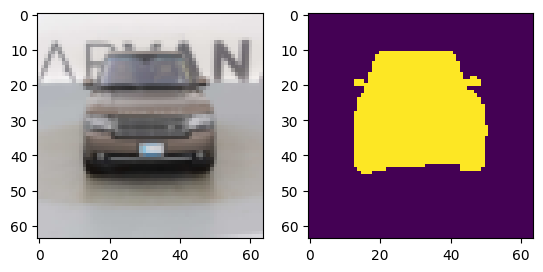

In [64]:
image, mask = train_dataset[2]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.array(image).transpose((1,2,0)))
plt.subplot(1,2,2)
plt.imshow(np.array(mask).squeeze())
plt.show()

In [65]:
# Convert to numpy arrays
image_np = np.array(image)  # Image should already be in a 3D array (C, H, W)
mask_np = np.array(mask)    # Mask should already be in a 2D array (H, W)

print(np.shape(image_np), np.shape(mask_np))

(3, 64, 64) (64, 64)


### The U-Net Network

In [67]:
class contracting(nn.Module):
    def __init__(self):
        super().__init__()
        # Conv2d n_channels, out_channels, kernel_size
        # In U-Net (and many other CNN architectures), it’s common to use two consecutive convolutional layers before downsampling (with max pooling)
        # This contributes to increase feature representation
        self.layer1 = nn.Sequential(nn.Conv2d(3, 64, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(64, 64, 3, stride=1, padding=1), nn.ReLU()) # input: (3, 64, 64); output: 64x64x64

        self.layer2 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(128, 128, 3, stride=1, padding=1), nn.ReLU()) # input 64x32x32; output: 128x32x32

        self.layer3 = nn.Sequential(nn.Conv2d(128, 256, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(256, 256, 3, stride=1, padding=1), nn.ReLU()) # input 128x16x16; output: 256x16x16

        self.layer4 = nn.Sequential(nn.Conv2d(256, 512, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(512, 512, 3, stride=1, padding=1), nn.ReLU()) # input 256x8x8; output: 512x8x8

        self.layer5 = nn.Sequential(nn.Conv2d(512, 1024, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(1024, 1024, 3, stride=1, padding=1), nn.ReLU()) # input 512x4x4; output: 1024x4x4

        self.down_sample = nn.MaxPool2d(2, stride=2)


    def forward(self, X):
        X1 = self.layer1(X)
        X2 = self.layer2(self.down_sample(X1))
        X3 = self.layer3(self.down_sample(X2))
        X4 = self.layer4(self.down_sample(X3))
        X5 = self.layer5(self.down_sample(X4))
        return X5, X4, X3, X2, X1


class expansive(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Conv2d(64, 2, 3, stride=1, padding=1)

        self.layer2 = nn.Sequential(nn.Conv2d(128, 64, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(64, 64, 3, stride=1, padding=1), nn.ReLU())

        self.layer3 = nn.Sequential(nn.Conv2d(256, 128, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(128, 128, 3, stride=1, padding=1), nn.ReLU())

        self.layer4 = nn.Sequential(nn.Conv2d(512, 256, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(256, 256, 3, stride=1, padding=1), nn.ReLU())

        self.layer5 = nn.Sequential(nn.Conv2d(1024, 512, 3, stride=1, padding=1), nn.ReLU(), nn.Conv2d(512, 512, 3, stride=1, padding=1), nn.ReLU())

        # N.b.: for ConvTranspose2d:
        # 1. ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0)
        # 2. output_dim=(n−1)×s−2p+m+output_padding

        self.up_sample_54 = nn.ConvTranspose2d(1024, 512, 2, stride=2) # input: 1024x4x4; output: 512x8x8

        self.up_sample_43 = nn.ConvTranspose2d(512, 256, 2, stride=2)

        self.up_sample_32 = nn.ConvTranspose2d(256, 128, 2, stride=2)

        self.up_sample_21 = nn.ConvTranspose2d(128, 64, 2, stride=2)


    def forward(self, X5, X4, X3, X2, X1):
        X = self.up_sample_54(X5) # input: 1024x4x4; output: 512x8x8
        X4 = torch.cat([X, X4], dim=1) # Concatenate 512x8x8 with 512x8x8 to give 1024x8x8
        X4 = self.layer5(X4)   # Reduces the channels to 512x8x8

        X = self.up_sample_43(X4)
        X3 = torch.cat([X, X3], dim=1)
        X3 = self.layer4(X3)

        X = self.up_sample_32(X3)
        X2 = torch.cat([X, X2], dim=1)
        X2 = self.layer3(X2)

        X = self.up_sample_21(X2)
        X1 = torch.cat([X, X1], dim=1)
        X1 = self.layer2(X1)

        X = self.layer1(X1)         # final output should be 2x64x64)

        return X


class unet(nn.Module):
    def __init__(self):
        super().__init__()

        # Encoder
        self.down = contracting()

        # Decoder
        self.up = expansive()

    def forward(self, X):
        # Encoder
        X5, X4, X3, X2, X1 = self.down(X)

        # Decoder
        X = self.up(X5, X4, X3, X2, X1)
        return X


In [71]:
# check
model = unet()
tmpx = torch.ones((1,3, 64, 64))
model(tmpx).shape

torch.Size([1, 2, 64, 64])

### Train the Network

In [72]:
# Create network optimizer and loss function

model = unet()
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss = torch.nn.CrossEntropyLoss()

In [74]:
epochs = 10

epoch_loss = []

for epoch in range(epochs):
    print('='*30)
    print('Epoch {} / {}'.format(epoch, epochs))

    # Set variables
    correct = 0
    overlap = 0
    union = 0
    _len = 0
    l = 0
    count = 0

    # Loop over the batches
    for index, (X, Y) in enumerate(train_dataloader):
        print(f'\tBatch {index}')

        if device is not None:
            X = X.to(device)
            Y = Y.to(device)

        # Call the model (image to mask)
        R = model(X)

        # Compute the loss
        L = loss(R, Y.long())

        # Do PyTorch stuff
        optimizer.zero_grad()
        L.backward()
        optimizer.step()

        # Compute Stats
        pred = R.data.max(1)[1]
        pred_sum, label_sum, overlap_sum = (pred==1).sum(), (Y==1).sum(), (pred*Y==1).sum()
        print(f'\t label_sum {label_sum}  pred_sum {pred_sum}  overlap_sum {overlap_sum}')

#         plt.figure(1)
#         plt.subplot(1,2,1)
#         plt.imshow(Y[0].cpu())
#         plt.clim((0,1))
#         plt.subplot(1,2,2)
#         plt.imshow(pred[0].cpu())
#         plt.clim((0,1))
#         plt.show()

        union_sum = pred_sum+label_sum-overlap_sum

        # IoU for accuracy
        overlap = overlap+overlap_sum.data.item()
        union = union+union_sum.data.item()
        l = l+L.data.item()
        count = count+1

    _loss = l/count
    _accuracy = overlap/union
    string = "epoch: {}, accuracy: {}, loss: {}".format(epoch, _accuracy, _loss)
    print(string)

    epoch_loss.append(_loss)

Epoch 0 / 10


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


	Batch 0
	 label_sum 19901  pred_sum 16  overlap_sum 0
	Batch 1
	 label_sum 19453  pred_sum 16  overlap_sum 0
	Batch 2
	 label_sum 19286  pred_sum 0  overlap_sum 0
	Batch 3
	 label_sum 20708  pred_sum 0  overlap_sum 0
	Batch 4
	 label_sum 21073  pred_sum 0  overlap_sum 0
	Batch 5
	 label_sum 19582  pred_sum 0  overlap_sum 0
	Batch 6
	 label_sum 19161  pred_sum 0  overlap_sum 0
	Batch 7
	 label_sum 20005  pred_sum 0  overlap_sum 0
	Batch 8
	 label_sum 18707  pred_sum 0  overlap_sum 0
	Batch 9
	 label_sum 19435  pred_sum 0  overlap_sum 0
	Batch 10
	 label_sum 18486  pred_sum 0  overlap_sum 0
	Batch 11
	 label_sum 19524  pred_sum 0  overlap_sum 0
	Batch 12
	 label_sum 19655  pred_sum 0  overlap_sum 0
	Batch 13
	 label_sum 20346  pred_sum 0  overlap_sum 0
	Batch 14
	 label_sum 19963  pred_sum 0  overlap_sum 0
	Batch 15
	 label_sum 20673  pred_sum 0  overlap_sum 0
	Batch 16
	 label_sum 18831  pred_sum 0  overlap_sum 0
	Batch 17
	 label_sum 18553  pred_sum 0  overlap_sum 0
	Batch 18
	 label_

### Plot the loss curve

Text(0.5, 1.0, 'Epoch Loss')

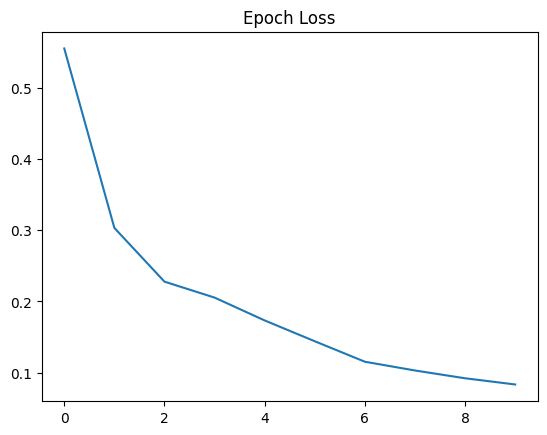

In [75]:
plt.figure()
plt.plot(epoch_loss)
plt.title('Epoch Loss')

### Plot an Example

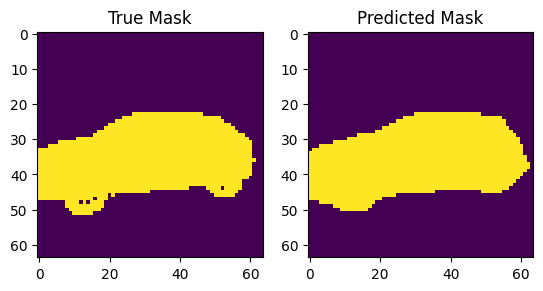

In [76]:
plt.figure(1)

# Plot the actual label
plt.subplot(1,2,1)
plt.imshow(Y[0].cpu())
plt.clim((0,1))
plt.title('True Mask')

# Show the predicted label
plt.subplot(1,2,2)
plt.imshow(pred[0].cpu())
plt.clim((0,1))
plt.title('Predicted Mask')
plt.show()

### Exercise

* Complete this notebook by dividing your dataset in training, validation and test datasets.

* Show learning curves.

* Retrain your network and do segmentation on test dataset.

* How do you assess the quality of your results?